In [109]:
import warnings
warnings.filterwarnings('ignore')

import os
import math
import zipfile
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA


# Mount to nipchan@uscs.edu drive
# print(os.listdir())
from google.colab import drive
# drive.mount("/content/drive")
# print(os.listdir())
if "drive" in os.listdir():
    os.chdir("drive/MyDrive/data/msmc-data/") # Made a directory in home Drive called "data"
np.seterr(divide = "ignore")

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [114]:
'''
Create a df (relevant_df) which contains taxa info and genlength of bird samples
used in B100K dataset

This should shine light on how effectively we can guess an organism's generation
length only given its genus, family, or order
'''
avian_meta_df = pd.read_excel("meta-data/Supplementary_Table_1_corrected.xlsx", header=1)
avian_meta_df["Genus"] = pd.Series(x.split(" ")[0] for x in avian_meta_df["Latin name"])
relevant_df = avian_meta_df[["Order", "Family", "Genus", "Latin name"]]
relevant_df = relevant_df.set_index("Latin name")
# [len(relevant_df[x].unique()) for x in relevant_df]

# Create df for generation lengths of avian samples
avian_genlen_df = pd.read_csv("generation_lengths/generation_times.txt", sep="\t")
avian_genlen_df["taxa"] = pd.Series([x.replace("_", " ") for x in avian_genlen_df["taxa"]])
avian_genlen_df = avian_genlen_df.set_index("taxa")

namelist = relevant_df.index.tolist()

relevant_df["GenLength"] = np.nan
# 
failures = 0
avians_with_genlen = []
avians_wo_genlen = []
for i in namelist:
    try:
        relevant_df.loc[i, "GenLength"] = avian_genlen_df.loc[i, "GenLength"]
        avians_with_genlen.append(i)
    except:
        failures += 1
        avians_wo_genlen.append(i)
print(failures)
relevant_df = relevant_df.dropna()
relevant_df

14


,Order,Family,Genus,GenLength
Latin name,,,,
Charadrius vociferus,Charadriiformes,Charadriidae,Charadrius,3.924036
Acanthisitta chloris,Passeriformes,Acanthisittidae,Acanthisitta,1.890638
Apaloderma vittatum,Trogoniformes,Trogonidae,Apaloderma,3.649392
Aptenodytes forsteri,Sphenisciformes,Spheniscidae,Aptenodytes,16.401490
Balearica regulorum,Gruiformes,Gruidae,Balearica,9.252158
...,...,...,...,...
Cettia cetti,Passeriformes,Scotocercidae,Cettia,2.179790
Xiphorhynchus elegans,Passeriformes,Furnariidae,Xiphorhynchus,3.290447
Corvus moneduloides,Passeriformes,Corvidae,Corvus,5.705632


In [115]:
[len(relevant_df[x].unique()) for x in relevant_df]


[37, 215, 321, 349]

[Text(0, 0, 'Charadriiformes'),
 Text(0, 0, 'Passeriformes'),
 Text(0, 0, 'Trogoniformes'),
 Text(0, 0, 'Sphenisciformes'),
 Text(0, 0, 'Gruiformes'),
 Text(0, 0, 'Bucerotiformes'),
 Text(0, 0, 'Caprimulgiformes'),
 Text(0, 0, 'Cariamiformes'),
 Text(0, 0, 'Accipitriformes'),
 Text(0, 0, 'Otidiformes'),
 Text(0, 0, 'Coliiformes'),
 Text(0, 0, 'Columbiformes'),
 Text(0, 0, 'Cuculiformes'),
 Text(0, 0, 'Pelecaniformes'),
 Text(0, 0, 'Eurypygiformes'),
 Text(0, 0, 'Falconiformes'),
 Text(0, 0, 'Procellariiformes'),
 Text(0, 0, 'Gaviiformes'),
 Text(0, 0, 'Leptosomatiformes'),
 Text(0, 0, 'Psittaciformes'),
 Text(0, 0, 'Coraciiformes'),
 Text(0, 0, 'Mesitornithiformes'),
 Text(0, 0, 'Opisthocomiformes'),
 Text(0, 0, 'Phaethontiformes'),
 Text(0, 0, 'Phoenicopteriformes'),
 Text(0, 0, 'Podicipiformes'),
 Text(0, 0, 'Pterocliformes'),
 Text(0, 0, 'Struthioniformes'),
 Text(0, 0, 'Musophagiformes'),
 Text(0, 0, 'Tinamiformes'),
 Text(0, 0, 'Strigiformes'),
 Text(0, 0, 'Casuariiformes'),
 Text

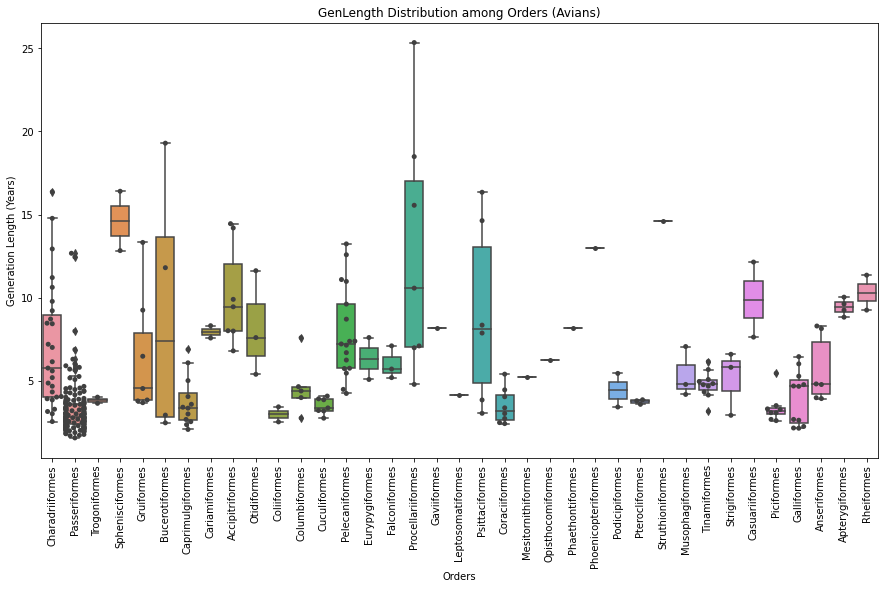

In [135]:
x_order = relevant_df["Order"].to_numpy()
x_family = relevant_df["Family"].to_numpy()
x_genus = relevant_df["Genus"].to_numpy()
y = relevant_df["GenLength"].to_numpy()

plt.figure(figsize = (15,8))

ax = sns.boxplot(x=x_order, y=y)
ax = sns.swarmplot(x=x_order, y=y, color="0.25")

ax.set_title("GenLength Distribution among Orders (Avians)")
ax.set_ylabel("Generation Length (Years)")
ax.set_xlabel("Orders")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Charadriidae'),
 Text(0, 0, 'Acanthisittidae'),
 Text(0, 0, 'Trogonidae'),
 Text(0, 0, 'Spheniscidae'),
 Text(0, 0, 'Gruidae'),
 Text(0, 0, 'Bucerotidae'),
 Text(0, 0, 'Trochilidae'),
 Text(0, 0, 'Caprimulgidae'),
 Text(0, 0, 'Cariamidae'),
 Text(0, 0, 'Cathartidae'),
 Text(0, 0, 'Apodidae'),
 Text(0, 0, 'Otididae'),
 Text(0, 0, 'Coliidae'),
 Text(0, 0, 'Columbidae'),
 Text(0, 0, 'Corvidae'),
 Text(0, 0, 'Cuculidae'),
 Text(0, 0, 'Ardeidae'),
 Text(0, 0, 'Eurypygidae'),
 Text(0, 0, 'Falconidae'),
 Text(0, 0, 'Procellariidae'),
 Text(0, 0, 'Gaviidae'),
 Text(0, 0, 'Thraupidae'),
 Text(0, 0, 'Accipitridae'),
 Text(0, 0, 'Leptosomidae'),
 Text(0, 0, 'Psittaculidae'),
 Text(0, 0, 'Meropidae'),
 Text(0, 0, 'Mesitornithidae'),
 Text(0, 0, 'Strigopidae'),
 Text(0, 0, 'Threskiornithidae'),
 Text(0, 0, 'Opisthocomidae'),
 Text(0, 0, 'Pelecanidae'),
 Text(0, 0, 'Phaethontidae'),
 Text(0, 0, 'Phalacrocoracidae'),
 Text(0, 0, 'Phoenicopteridae'),
 Text(0, 0, 'Podicipedidae'),
 Text(0,

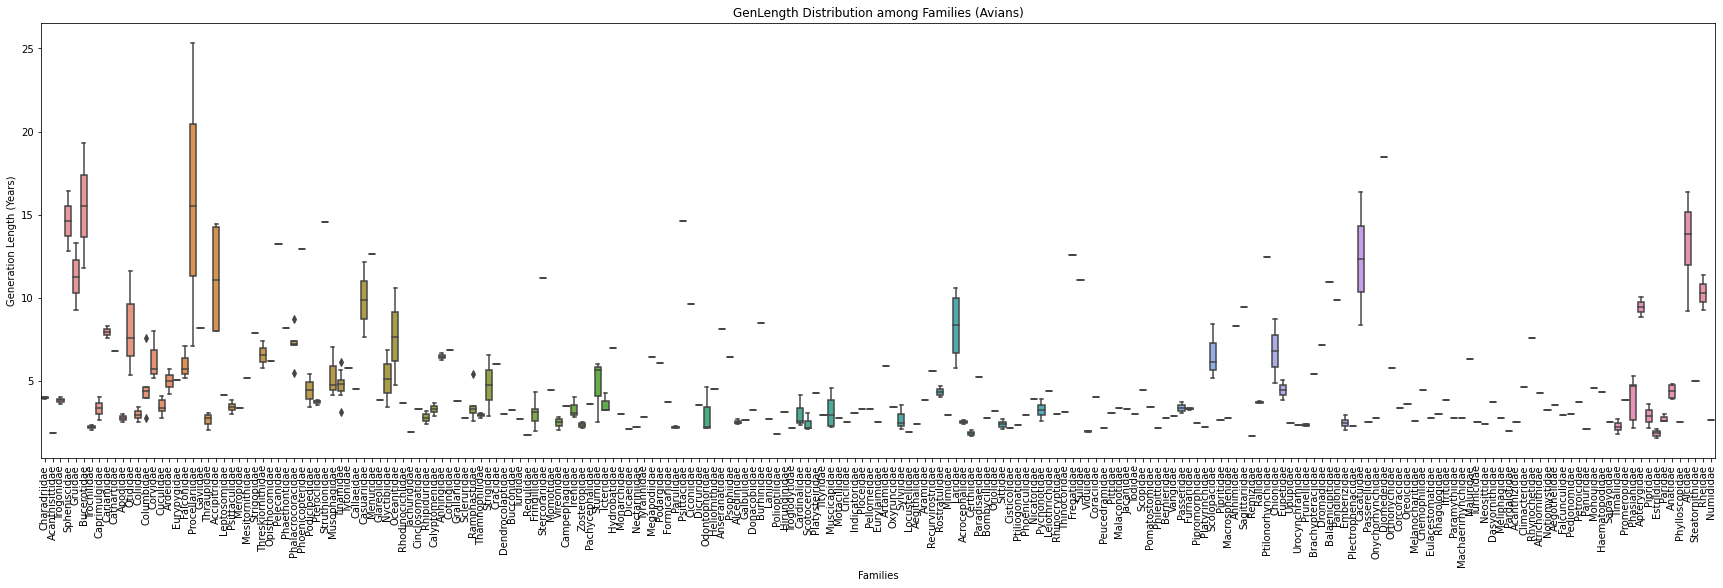

In [128]:
plt.figure(figsize = (30,8))

# ax = sns.swarmplot(x=x_order, y=y)
ax = sns.boxplot(x=x_family, y=y)
ax.set_title("GenLength Distribution among Families (Avians)")
ax.set_ylabel("Generation Length (Years)")
ax.set_xlabel("Families")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Charadrius'),
 Text(0, 0, 'Acanthisitta'),
 Text(0, 0, 'Apaloderma'),
 Text(0, 0, 'Aptenodytes'),
 Text(0, 0, 'Balearica'),
 Text(0, 0, 'Buceros'),
 Text(0, 0, 'Calypte'),
 Text(0, 0, 'Antrostomus'),
 Text(0, 0, 'Cariama'),
 Text(0, 0, 'Cathartes'),
 Text(0, 0, 'Chaetura'),
 Text(0, 0, 'Chlamydotis'),
 Text(0, 0, 'Colius'),
 Text(0, 0, 'Columba'),
 Text(0, 0, 'Corvus'),
 Text(0, 0, 'Cuculus'),
 Text(0, 0, 'Egretta'),
 Text(0, 0, 'Eurypyga'),
 Text(0, 0, 'Falco'),
 Text(0, 0, 'Fulmarus'),
 Text(0, 0, 'Gavia'),
 Text(0, 0, 'Geospiza'),
 Text(0, 0, 'Haliaeetus'),
 Text(0, 0, 'Leptosomus'),
 Text(0, 0, 'Melopsittacus'),
 Text(0, 0, 'Merops'),
 Text(0, 0, 'Mesitornis'),
 Text(0, 0, 'Nestor'),
 Text(0, 0, 'Nipponia'),
 Text(0, 0, 'Opisthocomus'),
 Text(0, 0, 'Pelecanus'),
 Text(0, 0, 'Phaethon'),
 Text(0, 0, 'Phalacrocorax'),
 Text(0, 0, 'Phoenicopterus'),
 Text(0, 0, 'Podiceps'),
 Text(0, 0, 'Pterocles'),
 Text(0, 0, 'Pygoscelis'),
 Text(0, 0, 'Struthio'),
 Text(0, 0, 'Tauraco'

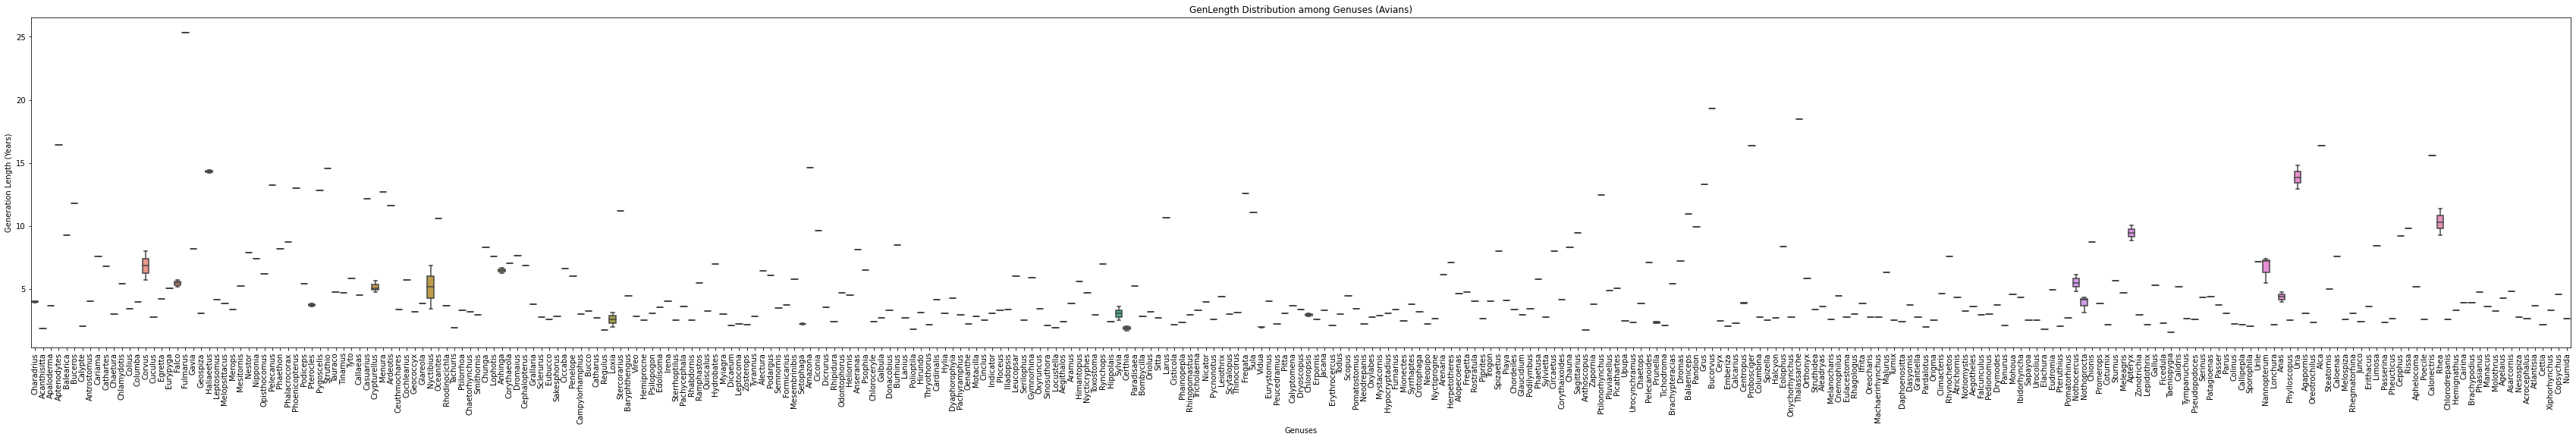

In [129]:
plt.figure(figsize = (60,8))

# ax = sns.swarmplot(x=x_order, y=y)
ax = sns.boxplot(x=x_genus, y=y)
ax.set_title("GenLength Distribution among Genuses (Avians)")
ax.set_ylabel("Generation Length (Years)")
ax.set_xlabel("Genuses")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [101]:
avian_genlen_df.loc["Struthio camelus", "GenLength"]

14.58442945

In [83]:
failures = 0
avians_with_genlen = []
avians_wo_genlen = []
for i in namelist:
    try:
        relevant_df.loc[i] = avian_genlen_df.loc[i]
        avians_with_genlen.append(i)
    except:
        failures += 1
        avians_wo_genlen.append(i)
print(failures)

14


In [84]:
relevant_df

,Order,Family,Genus,GenLength
Latin name,,,,
Charadrius vociferus,NaN,NaN,NaN,3.924036
Acanthisitta chloris,NaN,NaN,NaN,1.890638
Apaloderma vittatum,NaN,NaN,NaN,3.649392
Aptenodytes forsteri,NaN,NaN,NaN,16.401490
Balearica regulorum,NaN,NaN,NaN,9.252158
...,...,...,...,...
Cettia cetti,NaN,NaN,NaN,2.179790
Xiphorhynchus elegans,NaN,NaN,NaN,3.290447
Corvus moneduloides,NaN,NaN,NaN,5.705632


In [ ]:
'''
Make a scatter of generation length vs category. Category can be either
genus, family, or order.
'''